<a href="https://colab.research.google.com/github/Matilda045/DATA-SCIENCE-MODEL/blob/main/car_sales_predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASCIENCE PROJECT WORKFLOW** #

# **Car Sales Analysis and Predictive Car Model**

**Problem Statement**


The project aims to

* create a predictive model
* the model takes values for select features of a vehicle
* and predicts the one-year resale value

# **Source for Relevant Data**

The data was obtained from an online repository of real life data sets, stored in a csv file.


# **Import Dataset**

In [20]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from google.colab import files

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Car.csv")

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Examine the Data** #

In [23]:
# examine the first few rows using head()
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [24]:
# examine the first few rows using tail()
df.tail()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [25]:
#use info toget a brief information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

**Remove Irregularities**

Observed Irregularities
-Null values

# Addressing Null Values
_ You can do this by dropping rows with null values & you need to know the effect of dropping these rows


In [26]:
#Drop or deleting rows
df.dropna()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


In [27]:
# Filling with Forward fillling Method
df.info()

df.fillna(method="ffill", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

<ipython-input-27-03d071cd34b2>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


**Exploratory Data Analysis**

In [28]:
df["__year_resale_value"]

,__year_resale_value
0,16.360
1,19.875
2,18.225
3,29.725
4,22.255
...,...
152,13.760
153,13.760
154,13.760
155,13.760


In [29]:
# summary statistics....
df["__year_resale_value"].describe()


,__year_resale_value
count,157.000000
mean,19.775892
std,14.071017
min,5.160000
25%,11.260000
50%,14.010000
75%,20.190000
max,67.550000


In [30]:
df["__year_resale_value"].describe()

,__year_resale_value
count,157.000000
mean,19.775892
std,14.071017
min,5.160000
25%,11.260000
50%,14.010000
75%,20.190000
max,67.550000


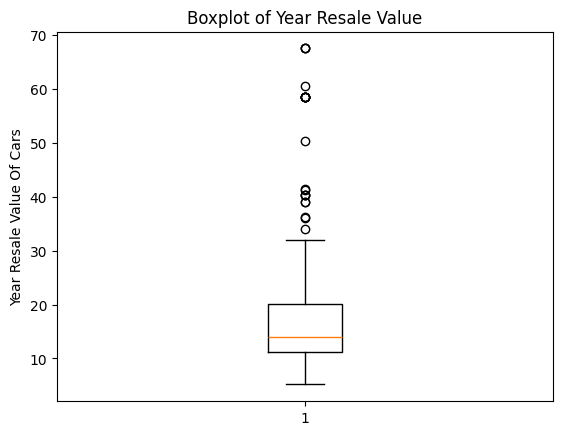

In [31]:
# boxplot

plt.boxplot(df["__year_resale_value"])
plt.title("Boxplot of Year Resale Value")
plt.ylabel("Year Resale Value Of Cars")
plt.show()

Observing

# Calculate Interquartile Range
IQR = Q3 - Q1

# print(IQR)

# calculate upper andlower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound, lower_bound)

outliers = df[df[
  

In [32]:
# Let's remove outliers for "__year_resale_value" column

# Step 1 : calculate 25th and 75th percentiles
Q1 = df["__year_resale_value"].quantile(0.25)
Q3 = df["__year_resale_value"].quantile(0.75)

print(Q1, Q3)

11.26 20.19


In [33]:
# Step 2: Calculate Interquartile Range

IQR = Q3 - Q1

print(IQR)

8.930000000000001


In [34]:
# Step 3: calculate upper andlower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound, lower_bound)

# Step 4: Floor outliers (replace outlier values with upper_bound and low_bound values)

# flooring outliers above upper bound
df["__year_resale_value"] = np.where(df["__year_resale_value"] > upper_bound, upper_bound, df["__year_resale_value"])

# flooring outliers below lower bound
df["__year_resale_value"] = np.where(df["__year_resale_value"] < lower_bound, lower_bound, df["__year_resale_value"])

# flooring outliers below lower bound
df["__year_resale_value"] = np.where(df["__year_resale_value"] < lower_bound, lower_bound, df["__year_resale_value"])



33.58500000000001 -2.1350000000000033


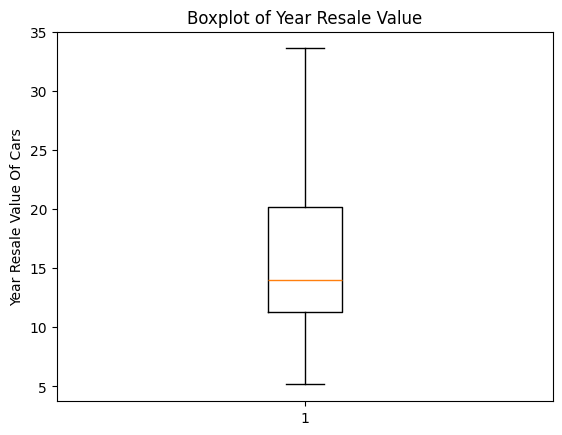

In [35]:
# Testing what we typed in step 4 for Year Resale Value of Cars Column
plt.boxplot(df["__year_resale_value"])
plt.title("Boxplot of Year Resale Value")
plt.ylabel("Year Resale Value Of Cars")
plt.show()

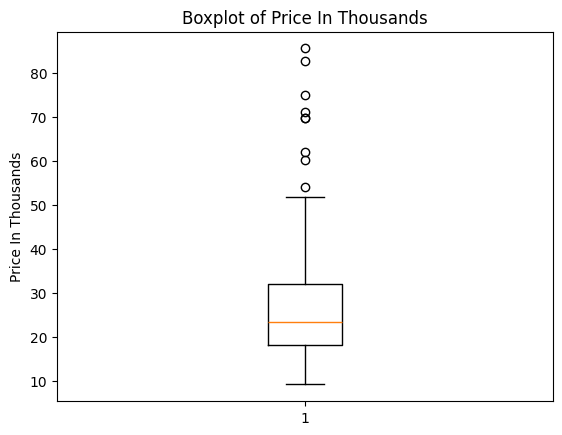

In [36]:
plt.boxplot(df["Price_in_thousands"])
plt.title("Boxplot of Price In Thousands")
plt.ylabel("Price In Thousands")
plt.show()

In [37]:
# Let's remove outliers for "Price_in_thousands" column

# Step 1 : calculate 25th and 75th percentiles
Q1 = df["Price_in_thousands"].quantile(0.25)
Q3 = df["Price_in_thousands"].quantile(0.75)

print(Q1, Q3)

18.145 31.93


In [38]:
# Step 2: Calculate Interquartile Range

IQR = Q3 - Q1

print(IQR)

13.785


In [39]:
# Step 3: calculate upper andlower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound, lower_bound)

# Step 4: Floor outliers (replace outlier values with upper_bound and low_bound values)

# flooring outliers above upper bound
df["Price_in_thousands"] = np.where(df["Price_in_thousands"] > upper_bound, upper_bound, df["Price_in_thousands"])

# flooring outliers below lower bound
df["Price_in_thousands"] = np.where(df["Price_in_thousands"] < lower_bound, lower_bound, df["Price_in_thousands"])

# flooring outliers below lower bound
df["Price_in_thousands"] = np.where(df["Price_in_thousands"] < lower_bound, lower_bound, df["Price_in_thousands"])

52.6075 -2.5325000000000024


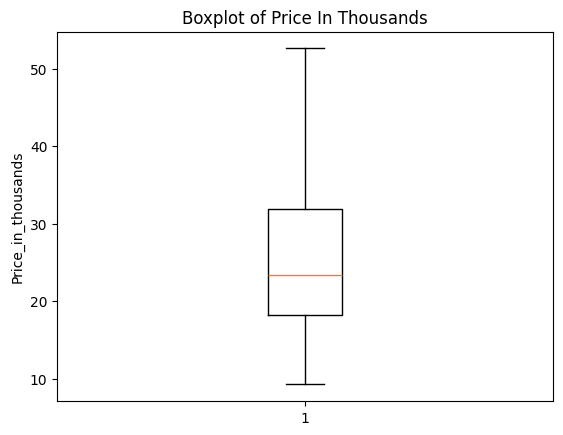

In [40]:
# Testing what we typed in step 4 for Price In Thousands Column
plt.boxplot(df["Price_in_thousands"])
plt.title("Boxplot of Price In Thousands")
plt.ylabel("Price_in_thousands")
plt.show()

PLOTTING "Price_in_thousands" AGAINST "__year_resale_value"

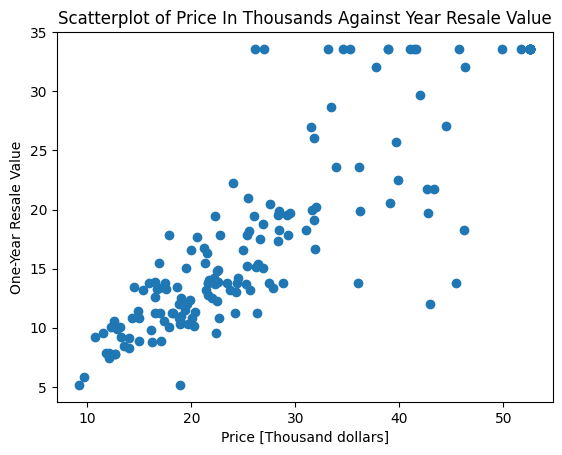

In [41]:
# pLOTTING A SCATTERPLOT OF "Price_in_thousands" AGAINST "__year_resale_value"

plt.scatter(x = df["Price_in_thousands"], y = df["__year_resale_value"])
plt.title("Scatterplot of Price In Thousands Against Year Resale Value")
plt.xlabel("Price [Thousand dollars]")
plt.ylabel("One-Year Resale Value")
plt.show()

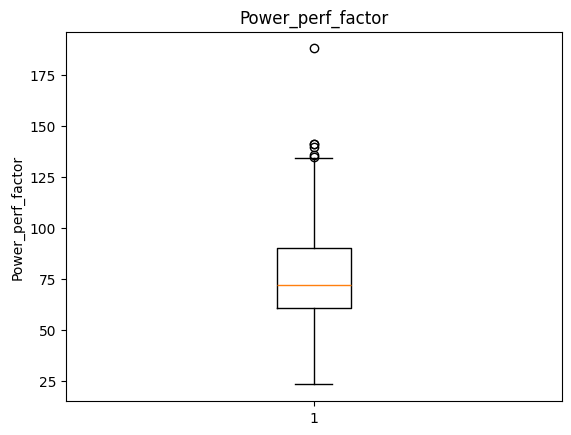

In [42]:
plt.boxplot(df["Power_perf_factor"])
plt.title("Power_perf_factor")
plt.ylabel("Power_perf_factor")
plt.show()

In [43]:
# Let's remove outliers for "Power_perf_factor" column

# Step 1 : calculate 25th and 75th percentiles
Q1 = df["Power_perf_factor"].quantile(0.25)
Q3 = df["Power_perf_factor"].quantile(0.75)

print(Q1, Q3)

# Step 2: Calculate Interquartile Range

IQR = Q3 - Q1

print(IQR)

# Step 3: calculate upper andlower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(upper_bound, lower_bound)

# Step 4: Floor outliers (replace outlier values with upper_bound and low_bound values)

# flooring outliers above upper bound
df["Power_perf_factor"] = np.where(df["Power_perf_factor"] > upper_bound, upper_bound, df["Power_perf_factor"])

# flooring outliers below lower bound
df["Power_perf_factor"] = np.where(df["Power_perf_factor"] < lower_bound, lower_bound, df["Power_perf_factor"])

# flooring outliers below lower bound
df["Power_perf_factor"] = np.where(df["Power_perf_factor"] < lower_bound, lower_bound, df["Power_perf_factor"])

60.72744693 90.21170005
29.484253120000005
134.43807973000003 16.50106724999999


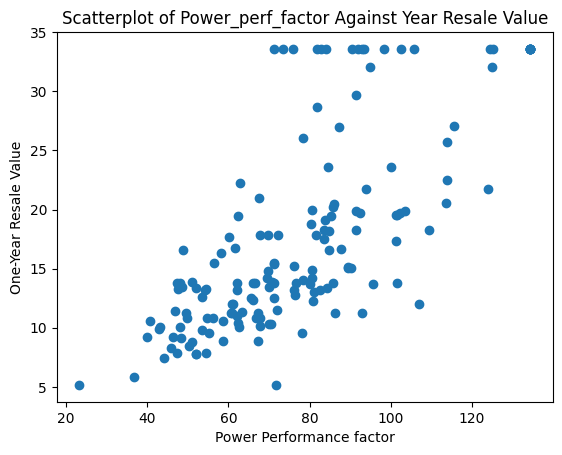

In [44]:
# pLOTTING A SCATTERPLOT OF "Power_perf_factor" AGAINST "__year_resale_value"

plt.scatter(x = df["Power_perf_factor"], y = df["__year_resale_value"])
plt.title("Scatterplot of Power_perf_factor Against Year Resale Value")
plt.xlabel("Power Performance factor")
plt.ylabel("One-Year Resale Value")
plt.show()

In [45]:
df["log_resale_value"] = np.log(df["__year_resale_value"])

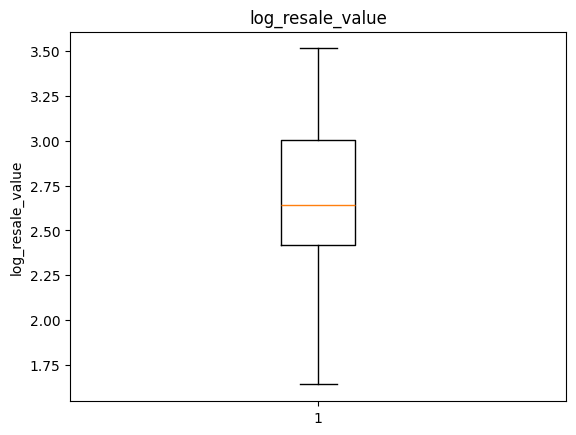

In [46]:
plt.boxplot(df["log_resale_value"])
plt.title("log_resale_value")
plt.ylabel("log_resale_value")
plt.show()

In [47]:
df["log_Power_perf_factor"] = np.log(df["Power_perf_factor"])

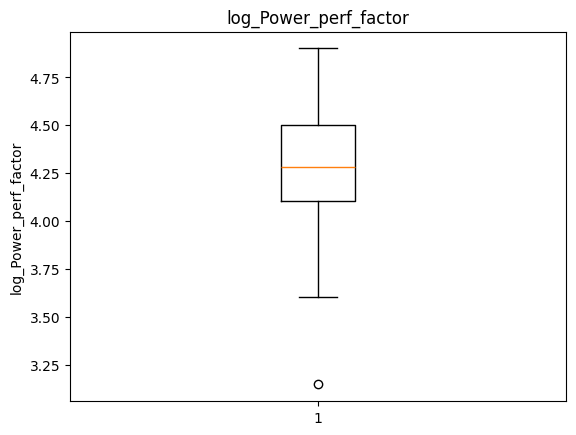

In [48]:
plt.boxplot(df["log_Power_perf_factor"])
plt.title("log_Power_perf_factor")
plt.ylabel("log_Power_perf_factor")
plt.show()

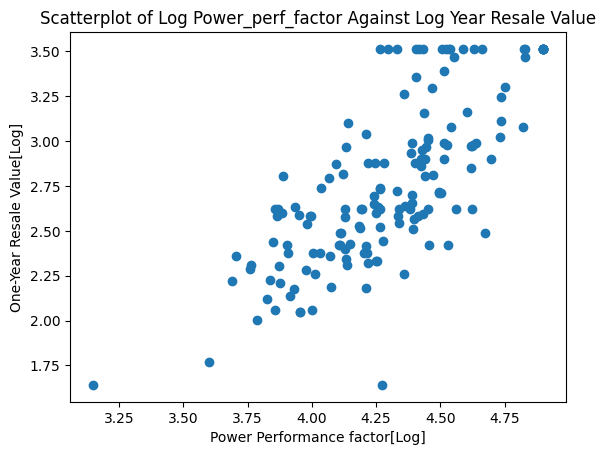

In [49]:
# pLOTTING A SCATTERPLOT OF "log_Power_perf_factor" AGAINST "log_resale_value"

plt.scatter(x = df["log_Power_perf_factor"], y = df["log_resale_value"])
plt.title("Scatterplot of Log Power_perf_factor Against Log Year Resale Value")
plt.xlabel("Power Performance factor[Log]")
plt.ylabel("One-Year Resale Value[Log]")
plt.show()

Comparing the "Vehicle_type" AGAINST "__year_resale_value"

In [50]:
df[["Vehicle_type", "__year_resale_value"]]


,Vehicle_type,__year_resale_value
0,Passenger,16.360
1,Passenger,19.875
2,Passenger,18.225
3,Passenger,29.725
4,Passenger,22.255
...,...,...
152,Passenger,13.760
153,Passenger,13.760
154,Passenger,13.760
155,Passenger,13.760


In [51]:
df["Vehicle_type"].value_counts()

,count
Vehicle_type,
Passenger,116
Car,41


In [52]:
# summary statistics for "__year_resale_value" based on Vehicles types

df.groupby("Vehicle_type")["__year_resale_value"].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle_type,,,,,,,,
Car,41.0,17.307683,6.459281,7.85,13.325,15.51,19.4250,33.585
Passenger,116.0,17.431853,8.771267,5.16,10.790,13.76,21.8575,33.585


In [53]:
# correlation matrix for Vehicle_type, __year_resale_value, Horsepower, Price_in_thousands, Fuel_efficiency, Power_perf_factor

df[["__year_resale_value", "Horsepower", "Price_in_thousands", "Fuel_efficiency", "Power_perf_factor"]].corr()

,__year_resale_value,Horsepower,Price_in_thousands,Fuel_efficiency,Power_perf_factor
__year_resale_value,1.000000,0.669260,0.846254,-0.418972,0.725327
Horsepower,0.669260,1.000000,0.854089,-0.608256,0.976281
Price_in_thousands,0.846254,0.854089,1.000000,-0.538255,0.913603
Fuel_efficiency,-0.418972,-0.608256,-0.538255,1.000000,-0.610648
Power_perf_factor,0.725327,0.976281,0.913603,-0.610648,1.000000


In [54]:
# Going by the EDA done, Price_in_thousands column is the most appropriate column for a simple linear regression model that predicts __year_resale_value

# **Decide on Most Appropriate Machine Learning Model**


A simple linear regression is the most appropriate for learning purposes

# **Train & Test Model**

Before a model is created, the dataset needs to be:

- trimmed to the relevant columns,
- the trimmed data is then divided first into feature matrix and target vector,
- the data is then vertically divided into training and tesing data.


In [55]:
# trimming the data to the relevant columns,

model_df = df[["__year_resale_value", "Price_in_thousands"]]
model_df


,__year_resale_value,Price_in_thousands
0,16.360,21.50
1,19.875,28.40
2,18.225,28.40
3,29.725,42.00
4,22.255,23.99
...,...,...
152,13.760,24.40
153,13.760,27.50
154,13.760,28.80
155,13.760,45.50


In [56]:
# divide data into feature matrix and target vector,

feature = ["Price_in_thousands"]
target = "__year_resale_value"

X = model_df[feature]
y = model_df[target]

In [57]:
# dividing data into training and testing data

# X_train  --- 1st 7 rows larger chunk , X_test -- Last 3 rows smaller chunk
# y_train --  --- 1st 7 rows larger chunk;  y_test -- Last 3 rows smaller chunk


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(X_train)
print(X_test)
print(y_train)
print(y_test)


(125, 1) (32, 1) (125,) (32,)
     Price_in_thousands
136              13.108
55               12.050
124              41.430
84               31.807
105              29.299
..                  ...
71               37.805
106              22.799
14               39.895
92               31.750
102              20.390

[125 rows x 1 columns]
     Price_in_thousands
126             52.6075
45              19.5650
133             15.0100
138             25.5450
111             36.2290
29              24.4950
95              52.6075
97              41.0000
94              52.6075
139             16.8750
19              13.2600
56              26.9350
15              44.4750
69              26.8950
24              45.7050
30              22.2450
125             52.6075
108             18.1450
155             45.5000
65              29.4650
119             19.7200
18              46.2250
12              31.9650
9               38.9000
31              16.4800
81              17.3570
51        

**CREATE THE PREDICTIVE** **MODEL**



In [58]:
# Creating a simple linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# fit a model and train a model means the same thing

LinearRegression()

In [59]:
# Use the model


model.predict([[10]]) [0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


7.098069900662342

In [60]:
# Use the model

model.predict([[10]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.0980699])

# **Reordering the Model Creation and Performance Evaluation Steps**

**Baselining**

In [61]:
# Let's create a baseline model
# baseline_model=

y_train_mean = y_train.mean()
y_train_mean

16.52324

In [62]:
# let's create predictions using the baseline model
#baseline_pred =

y_train_pred = [y_train_mean] * len(y_test)
len(y_train_pred)

32

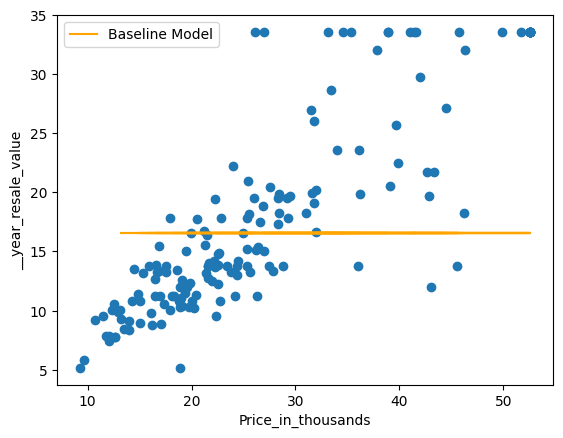

In [63]:
# visualising the baseline on a scatterplot

plt.plot(X_test.values, y_train_pred, color="orange", label="Baseline Model")
plt.scatter(X, y)
plt.xlabel("Price_in_thousands")
plt.ylabel("__year_resale_value")
plt.legend()

**EVALUATE bASELINE pERFORMANCE**

MAE ( Mean Absolute Error) evaluatuin will be used

In [64]:
# MAE FOR baseline model

baseline_mae = mean_absolute_error(y_test, y_train_pred)

print("The mean value of y_train values is:", y_train_mean)
print("The MAE for the baseline model is:", baseline_mae)

The mean value of y_train values is: 16.52324
The MAE for the baseline model is: 8.013703750000003


In [65]:
# MAE FOR baseline model

baseline_mae = mean_absolute_error(y_test, y_train_pred)

print("The mean value of y_train values is:", round(y_train_mean, 2))
print("The MAE for the baseline model is:", round(baseline_mae, 2))

The mean value of y_train values is: 16.52
The MAE for the baseline model is: 8.01


**BUILD And Evaluate Model**

**Create A Linear Regression Model**

In [66]:
# let's ctreate a linear regression model

model = LinearRegression()
model

LinearRegression()

Model Fitting (Training)

In [67]:
model.fit(X_train, y_train)

LinearRegression()

####**Test MOdel With Training Data**####

In [68]:
# we'd generate predictions using X-train

model_pred_train = model.predict(X_train)

model_pred_train

array([ 9.01675775,  8.36361369, 26.50101689, 20.56036914, 19.01208435,
       12.39174698,  9.85139932, 21.3709345 ,  6.625806  , 13.3301014 ,
       27.26034317, 13.26528086, 12.68189604, 25.05027157, 12.8948778 ,
       12.55225497,  8.04136303, 16.54334795,  9.55939824, 14.27154251,
       11.72810816, 12.58620858, 10.95026173, 14.26536912, 14.08325429,
       15.7346346 , 18.42005679, 17.34588791,  9.25813708, 27.34677055,
       25.41141456, 15.58956007, 14.49069765, 17.93853281, 32.85836809,
       14.1974619 , 20.43134541, 10.18414473, 17.16685977, 16.3562944 ,
       13.1726801 , 12.93809149, 17.9014925 ,  9.5427301 , 15.95070305,
       12.20345875, 33.40131725, 14.83146847, 16.75015632, 15.98774336,
        9.74645178, 14.2345022 , 16.57112818, 16.97548485, 33.40131725,
       18.42005679, 17.22180289, 27.47023824,  6.91225103, 31.72987343,
       24.93915066, 14.14190144, 21.88332541, 15.83340875, 11.23423741,
       11.96578346,  8.72784337, 12.68313072, 27.67395992, 18.94

####**Evaluate Model Performance 1**

In [69]:
# calculate model MAE for training data

model_train_mae = mean_absolute_error(y_train, model_pred_train)

round(model_train_mae, 2)

2.73

## **Compare Baseline MAE with Model's Training MAE**

In [70]:
# print baseline and model(train) MAE to compare both

print ("The baseline MAE is:\t\t", round(baseline_mae, 2))
print ("The model (train) MAE is:\t", round(model_train_mae, 2))

The baseline MAE is:		 8.01
The model (train) MAE is:	 2.73


**Visualize Model (Train Data) on ScatterPlot**

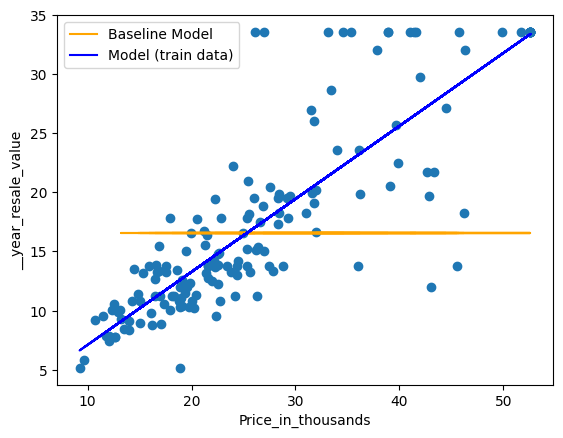

In [71]:
# visualising the baseline and model  (train data) on a scatterplot

plt.plot(X_test.values, y_train_pred, color="orange", label="Baseline Model")
plt.plot(X_train.values, model_pred_train, color="blue", label="Model (train data)")
plt.scatter(X, y)
plt.xlabel("Price_in_thousands")
plt.ylabel("__year_resale_value")
plt.legend()

Test Model With Testing Data

In [72]:
# Evaluate Model Performance

# model generates predictions off X_test Values

model_test_pred = model.predict(X_test)
model_test_pred

# At first, use the model to generate predictions against X_test values



array([33.40131725, 13.00291203, 10.19093546, 16.69459586, 23.2902397 ,
       16.04639051, 33.40131725, 26.23556137, 33.40131725, 11.34227164,
        9.1105932 , 17.55269629, 28.38081243, 17.52800275, 29.1401387 ,
       14.65737903, 33.40131725, 12.12629145, 29.01358432, 19.11456253,
       13.09859948, 29.46115469, 20.65790861, 24.93915066, 11.09842296,
       11.63982876, 14.62651211, 17.0372187 , 10.12302823, 26.60596443,
       10.74036666, 22.28768208])

**Visualize Model (Test Data) on Scatterplot**

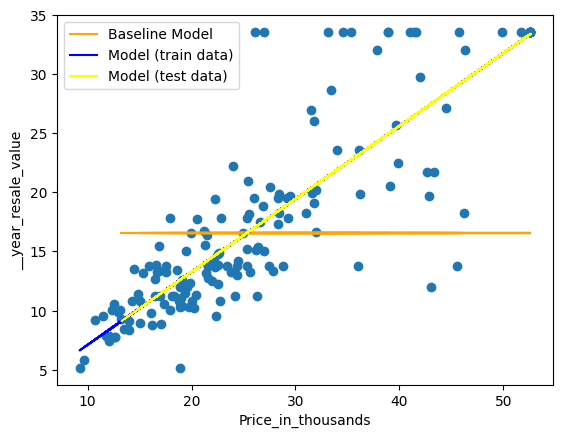

In [73]:
# visualising the baseline and model  (train data & test data) on a scatterplot

plt.plot(X_test.values, y_train_pred, color="orange", label="Baseline Model")
plt.plot(X_train.values, model_pred_train, color="blue", label="Model (train data)")
plt.plot(X_test.values, model_test_pred, color="yellow", label="Model (test data)")
plt.scatter(X, y)
plt.xlabel("Price_in_thousands")
plt.ylabel("__year_resale_value")
plt.legend()

**Evaluate Model Performance 2**

In [74]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

round(model_test_mae, 3)

3.533

**Report Model Performance**

Model performance is reported as fllows:

* Visualization of the model line on scatterplot, alongside the baseline line
* Explanation of the implications of MAE Values
* Use of linear mathematical equation

## **Model Deployment**

Deploying the model on streamlit requires the following steps:

* Save the model using libraries such as pickle
* Write code for streamlit app
* Save the streamlit code to app.py
* Upload these files to GitHub
* You also need to create a requirements.txt file, where you will list libraries used in your project
* Create a Streamlit cloud account
* Finally, you deploy your model on Streamlit cloud

**Saving the Model using Pickle**

In [75]:
with open("model.pkl", "wb") as f:
  pickle.dump(model, f)

In [76]:
# check if model.pkl was created

!ls

#this lists out your folder or drive

drive  model.pkl  sample_data


**Save model.pkl to local drive**

In [78]:
# saving model.pkl to computer drive

files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>